In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# A company started to invest in digital marketing as a new way of their product promotions. for that they collected a data and decided to carry out a study on it

In [2]:
data= pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


no null values

In [4]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


<AxesSubplot:xlabel='Sales_After_digital_add(in $)', ylabel='Count'>

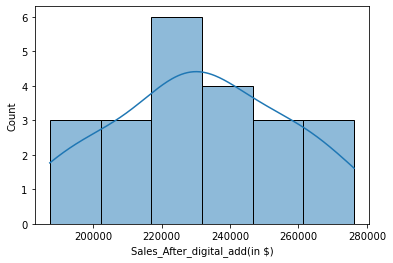

In [5]:
 sns.histplot(data['Sales_After_digital_add(in $)'], kde = True)

<AxesSubplot:xlabel='Sales_before_digital_add(in $)', ylabel='Count'>

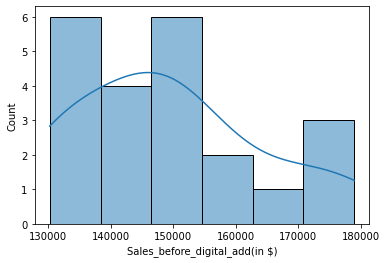

In [6]:
sns.histplot(data['Sales_before_digital_add(in $)'], kde = True)

# 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

Go for paired sample t test 
paired sample test compaires means from the same group at different times.

In [ ]:
# H0 : there is no significant increase in sales after stepping in to digital marketing
# H1 : there is significant increase in sales 

In [7]:

SB= data['Sales_before_digital_add(in $)']
SA = data['Sales_After_digital_add(in $)']
t_score, p_value = stats.ttest_rel(SB,SA)
print('t_value = ',t_score)
print('p_value = ',p_value)
alpha = 0.05

t_value =  -12.09070525287017
p_value =  6.336667004575778e-11


In [8]:
if p_value <= 0.05:
    print("we are rejecting null hypothesis")
else:
    print("we are failing to reject the null hypothesis")

we are rejecting null hypothesis


ie, there is significant increase in sales after digital marketing

# 2.The company needs to check whether there is any dependency between the features Region and Manager

In [ ]:
# H0 : there is no dependency between the features Region and Manager
# H1 : there is dependency between the features Region and Manager

In [9]:
data1 = pd.crosstab(data['Region'],data['Manager'])
data1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [10]:
data1.values

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

In [11]:
#observed values
observed_values = data1.values
print('Observed Values :', observed_values)

Observed Values : [[4 3 3]
 [4 1 2]
 [1 3 1]]


In [12]:
value = stats.chi2_contingency(data1)
value

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [13]:
#expected values
expected_values = value[3]
print('expected_values: ', expected_values)

expected_values:  [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [14]:
#finding degrees of freedom

no_of_rows = len(data1.iloc[:,:])
no_of_coloums = len(data1.iloc[:,:])
df= (no_of_rows-1) *(no_of_coloums-1)
print('degree of freedom : ', df)
alpha= 0.05


degree of freedom :  4


In [15]:
chi_square = sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square
chi_square_statistics = chi_square[0]+chi_square[1]+chi_square[2]

In [16]:
print('chi_square_statistics : ', chi_square_statistics)

chi_square_statistics :  3.0505668934240364


In [17]:
#p value
from scipy.stats import chi2
p_value = 1-chi2.cdf(x=chi_square_statistics,df= df)
print('p_value: ', p_value)
print('significance level: ', alpha)
print('degree of freedom: ', df)


p_value:  0.5493991051158094
significance level:  0.05
degree of freedom:  4


In [18]:
if p_value <= alpha:
    print('Reject null hypothesis. There is dependency between the features Region and Manager')
else:
    print('We are failing to reject null hypothesis.There is no dependency between the features Region and Manager')
    

We are failing to reject null hypothesis.There is no dependency between the features Region and Manager
